#                                                       **House Price Prediction Analysis**

# Imports

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

Load the dataset

In [24]:
data = pd.read_csv('/kaggle/input/housing-prices-dataset/Housing.csv')

Show information about the dataset

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


Convert objects to int 64

# Data Preprocessing

Convert Categorical Variables to Numerical

In [48]:
data["mainroad"] = data["mainroad"].apply(lambda x: 1 if x == 'yes' else 0)
data["guestroom"] = data["guestroom"].apply(lambda x: 1 if x == 'yes' else 0)
data["basement"] = data["basement"].apply(lambda x: 1 if x == 'yes' else 0)
data["hotwaterheating"] = data["hotwaterheating"].apply(lambda x: 1 if x == 'yes' else 0)
data["airconditioning"] = data["airconditioning"].apply(lambda x: 1 if x == 'yes' else 0)
data["prefarea"] = data["prefarea"].apply(lambda x: 1 if x == 'yes' else 0)
data["furnishingstatus"] = data["furnishingstatus"].map({"furnished" : 2, "semi-furnished": 1, "unfurnished": 0})

Describe the data

In [28]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


# Data Visualization

Distribution of House Prices

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


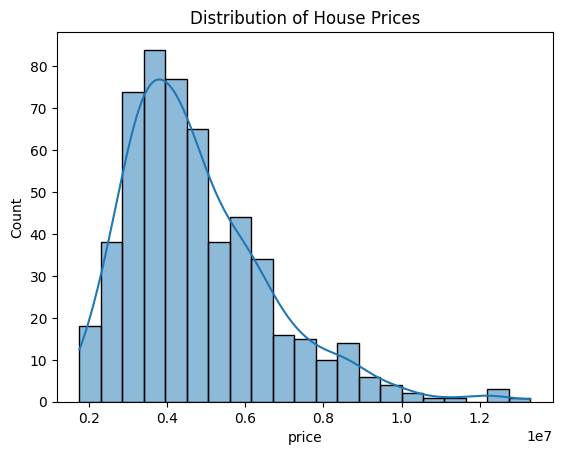

In [30]:
sns.histplot(data['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

Correlation heatmap

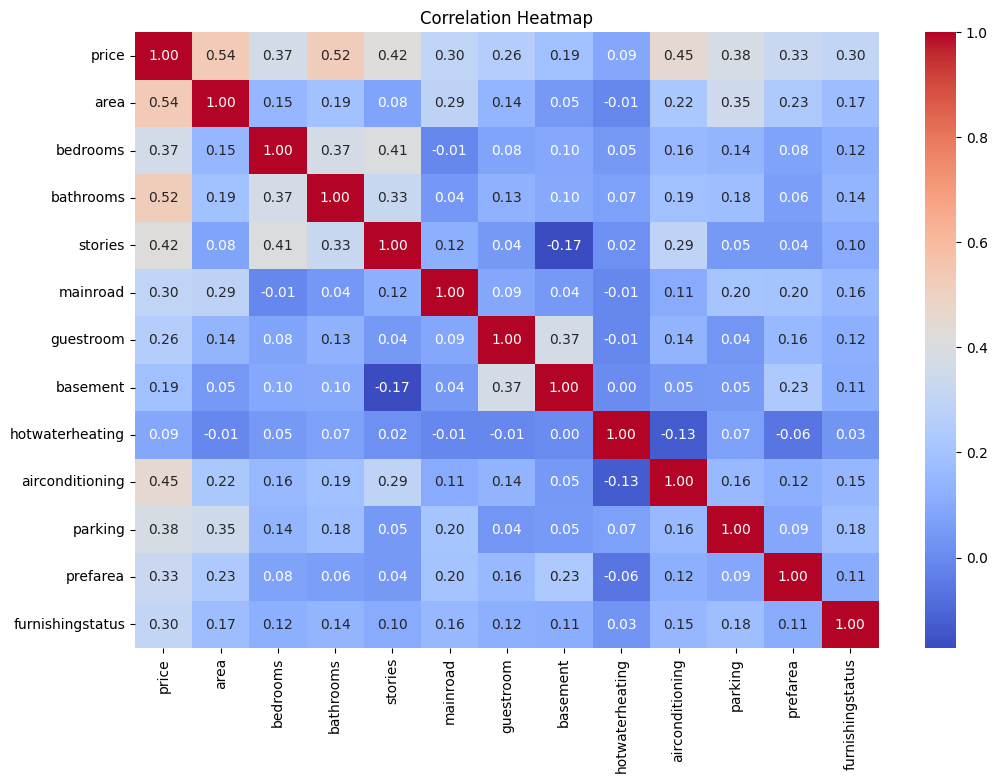

In [31]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Training and Predictions

split the data into training and testing sets

In [32]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Preprocessing Pipeline

In [36]:
numerical_features = X.columns

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

Applying the transformations to the training and test sets

In [38]:
X_train_scaled = numerical_transformer.fit_transform(X_train)
X_test_scaled = numerical_transformer.transform(X_test)

Creating a dictionary with models

In [39]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Model Training and Evaluation

In [40]:
for model_name, model in models.items():

    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    print(f'{model_name} Performance:')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R^2 Score:', r2_score(y_test, y_pred))
    print('---')

Linear Regression Performance:
Mean Absolute Error: 979679.6912959908
Mean Squared Error: 1771751116594.041
Root Mean Squared Error: 1331071.4167895128
R^2 Score: 0.6494754192267792
---
Decision Tree Performance:
Mean Absolute Error: 1264366.9724770642
Mean Squared Error: 2941356041284.404
Root Mean Squared Error: 1715038.20403057
R^2 Score: 0.41807989642586374
---
Random Forest Performance:
Mean Absolute Error: 1024146.5374617738
Mean Squared Error: 1955666037578.7202
Root Mean Squared Error: 1398451.299680729
R^2 Score: 0.613089552175642
---
XGBoost Performance:
Mean Absolute Error: 1062315.9931192661
Mean Squared Error: 2032404618961.4353
Root Mean Squared Error: 1425624.2909551715
R^2 Score: 0.5979075332022226
---


Linear Regression has the best performance because of the least Root Mean Squared Error and the Highest R^2 Score

# Hyperparameter Tuning

Defining parameter grids

In [43]:
ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

lasso_param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

elasticnet_param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

Performing GridSearchCV

In [46]:
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_scaled, y_train)
ridge_best_model = ridge_grid_search.best_estimator_

lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train_scaled, y_train)
lasso_best_model = lasso_grid_search.best_estimator_

elasticnet_grid_search = GridSearchCV(ElasticNet(), elasticnet_param_grid, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid_search.fit(X_train_scaled, y_train)
elasticnet_best_model = elasticnet_grid_search.best_estimator_


Evaluating the best models

In [47]:
models = {
    'Ridge': ridge_best_model,
    'Lasso': lasso_best_model,
    'ElasticNet': elasticnet_best_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f'{model_name} Regression Performance:')
    print('Best Parameters:', model.get_params())
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R^2 Score:', r2_score(y_test, y_pred))
    print('---')

Ridge Regression Performance:
Best Parameters: {'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Mean Absolute Error: 978653.4031173647
Mean Squared Error: 1778081197208.694
Root Mean Squared Error: 1333447.1107654378
R^2 Score: 0.648223071290926
---
Lasso Regression Performance:
Best Parameters: {'alpha': 1000, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Mean Absolute Error: 980007.761648819
Mean Squared Error: 1773549665735.2256
Root Mean Squared Error: 1331746.8474658483
R^2 Score: 0.6491195929045552
---
ElasticNet Regression Performance:
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': Fal

# Conclusion

After evaluating multiple regression models for predicting house prices, we found that Linear Regression outperformed other models with the lowest Root Mean Squared Error (RMSE) of approximately *1331071*. This indicates that our model's predictions closely align with actual house prices in the dataset. Features such as area, number of bedrooms, and the presence of certain amenities like air conditioning proved to be significant predictors of house prices, as indicated by their coefficients in the model.